## Tugas 2

Maulana Faizal Fardani

210411100081

Preprocessing hasil crawling data berita dari kompas.com

In [17]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time
import random

# Daftar user agents yang akan dirotasi
USER_AGENTS = [
    'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3',
    'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36',
    'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:89.0) Gecko/20100101 Firefox/89.0',
]

# Fungsi untuk mengambil dan mem-parsing HTML dari URL
def get_soup(url):
    headers = {
        'User-Agent': random.choice(USER_AGENTS)
    }
    try:
        response = requests.get(url, headers=headers)
        if response.status_code == 200:
            return BeautifulSoup(response.text, 'html.parser')
        else:
            print(f"Error {response.status_code} saat mengambil {url}")
            return None
    except Exception as e:
        print(f"Error: {e}")
        return None

def get_article_details(detail_url, category_name):
    detail_soup = get_soup(detail_url)
    if detail_soup:
        # Ambil konten dari div dengan class 'read__content'
        content_div = detail_soup.find('div', class_='read__content')
        content = ' '.join([p.text for p in content_div.find_all('p')]) if content_div else 'Tidak ada isi berita'

        # Coba ambil tanggal dari div dengan class 'videoKG-date' terlebih dahulu
        date_tag = detail_soup.find('div', class_='videoKG-date')
        if not date_tag:
            # Jika tidak ditemukan, ambil dari div dengan class 'read__time'
            date_tag = detail_soup.find('div', class_='read__time')

        date = date_tag.text.strip().split('-')[-1].strip() if date_tag else 'Tidak ada tanggal'

        # Ambil judul artikel
        title_tag = detail_soup.find('h1')
        title = title_tag.text.strip() if title_tag else 'Tidak ada judul'

        return {
            'judul': title,
            'isi_berita': content,
            'tanggal': date,
            'kategori': category_name,
        }
    return None


# Fungsi untuk mendapatkan artikel dari suatu kategori
def get_articles(category_url, category_name, max_articles):
    articles = []
    page = 1
    while len(articles) < max_articles:
        url = f'{category_url}?page={page}'
        print(f"Mengambil: {url}")
        soup = get_soup(url)
        if soup is None:
            break
        article_list = soup.find_all('h3', class_='article__title')
        if not article_list:
            print(f"Tidak ada artikel ditemukan di halaman {page}.")
            break
        for article in article_list:
            if len(articles) >= max_articles:
                break
            title_tag = article.find('a')
            detail_url = title_tag['href'] if title_tag else None
            if detail_url:
                article_details = get_article_details(detail_url, category_name)
                if article_details:
                    articles.append(article_details)

        sleep_time = random.uniform(3, 6)
#         print(f"Menunggu selama {sleep_time:.2f} detik sebelum mengambil halaman berikutnya...")
        time.sleep(sleep_time)

        page += 1
    return articles

# URL Kategori Kompas
categories = {
    'Otomotif': 'https://www.kompas.com/tag/otomotif',
    'Makanan': 'https://www.kompas.com/tag/makanan',
}

max_articles=100

# Mengumpulkan semua data
all_articles = []
for category_name, category_url in categories.items():
    print(f"Menambang kategori {category_name}...")
    articles = get_articles(category_url, category_name, max_articles)
    all_articles.extend(articles)

# Simpan ke dalam DataFrame
df = pd.DataFrame(all_articles)

# Simpan ke dalam file CSV tanpa kolom 'url'
df.to_csv('kompas_articles.csv', index=False)

# Tampilkan 10 data pertama dalam bentuk tabel
print(df.head(10))

print("Proses penambangan data selesai, data tersimpan dalam 'kompas_articles.csv' dan 10 data pertama ditampilkan.")


Menambang kategori Otomotif...
Mengambil: https://www.kompas.com/tag/otomotif?page=1
Mengambil: https://www.kompas.com/tag/otomotif?page=2
Mengambil: https://www.kompas.com/tag/otomotif?page=3
Mengambil: https://www.kompas.com/tag/otomotif?page=4
Mengambil: https://www.kompas.com/tag/otomotif?page=5
Mengambil: https://www.kompas.com/tag/otomotif?page=6
Mengambil: https://www.kompas.com/tag/otomotif?page=7
Menambang kategori Makanan...
Mengambil: https://www.kompas.com/tag/makanan?page=1
Mengambil: https://www.kompas.com/tag/makanan?page=2
Mengambil: https://www.kompas.com/tag/makanan?page=3
Mengambil: https://www.kompas.com/tag/makanan?page=4
Mengambil: https://www.kompas.com/tag/makanan?page=5
Mengambil: https://www.kompas.com/tag/makanan?page=6
Mengambil: https://www.kompas.com/tag/makanan?page=7
                                               judul  \
0  Moeldoko Siapkan Industri Baterai dengan Kolab...   
1  Impresi Desain Futuristik dan Aerodinamis dari...   
2  Toyota Klaim Permin

In [19]:
df=pd.read_csv("kompas_articles.csv")
df.head(1000)

,judul,isi_berita,tanggal,kategori
0,Moeldoko Siapkan Industri Baterai dengan Kolab...,"JAKARTA, KOMPAS.com - Ketua Umum Perkumpulan I...","20/11/2024, 16:01 WIB",Otomotif
1,Impresi Desain Futuristik dan Aerodinamis dari...,"JAKARTA, KOMPAS.com - Hyptec HT, produk premiu...","20/11/2024, 14:41 WIB",Otomotif
2,Toyota Klaim Permintaan Kendaraan Elektrifikas...,"JAKARTA, KOMPAS.com - Kondisi pasar otomotif n...","20/11/2024, 09:22 WIB",Otomotif
3,Jangan Keseringan Pakai Cas Cepat Kendaraan Li...,"JAKARTA, KOMPAS.com - Kebiasaan mengecas kenda...","20/11/2024, 08:42 WIB",Otomotif
4,PPN 12 Persen Jadi Momentum Percepatan Adopsi ...,"JAKARTA, KOMPAS.com - Ketua Umum Perkumpulan I...","20/11/2024, 07:02 WIB",Otomotif
...,...,...,...,...
195,9 Makanan yang Tidak Boleh Dimasukkan ke Blender,KOMPAS.com - Blender berfungsi untuk mencampur...,"28/10/2024, 18:35 WIB",Makanan
196,Kenali 5 Jenis Makanan yang Dapat Memicu Stres...,KOMPAS.com - Stres dan depresi adalah masalah ...,"28/10/2024, 17:49 WIB",Makanan
197,"Sering Asam Lambung, Ini Makanan yang Sebaikny...",KOMPAS.com - Gastroesophageal reflux disease (...,"28/10/2024, 10:32 WIB",Makanan
198,"Waspada Makanan yang Tercemar Bakteri E.coli, ...",KOMPAS.com - Menjaga kebersihan makanan adalah...,"27/10/2024, 21:51 WIB",Makanan


In [20]:

df = pd.read_csv("kompas_articles.csv")

df.head()

,judul,isi_berita,tanggal,kategori
0,Moeldoko Siapkan Industri Baterai dengan Kolab...,"JAKARTA, KOMPAS.com - Ketua Umum Perkumpulan I...","20/11/2024, 16:01 WIB",Otomotif
1,Impresi Desain Futuristik dan Aerodinamis dari...,"JAKARTA, KOMPAS.com - Hyptec HT, produk premiu...","20/11/2024, 14:41 WIB",Otomotif
2,Toyota Klaim Permintaan Kendaraan Elektrifikas...,"JAKARTA, KOMPAS.com - Kondisi pasar otomotif n...","20/11/2024, 09:22 WIB",Otomotif
3,Jangan Keseringan Pakai Cas Cepat Kendaraan Li...,"JAKARTA, KOMPAS.com - Kebiasaan mengecas kenda...","20/11/2024, 08:42 WIB",Otomotif
4,PPN 12 Persen Jadi Momentum Percepatan Adopsi ...,"JAKARTA, KOMPAS.com - Ketua Umum Perkumpulan I...","20/11/2024, 07:02 WIB",Otomotif


## **Preprocessing**

Preprocessing adalah proses membersihkan dan mempersiapkan data mentah agar siap digunakan oleh model machine learning. Ini meliputi penanganan data yang hilang, normalisasi, mengubah data kategori menjadi angka, dan membersihkan teks. Tujuannya agar data lebih mudah dipahami dan diolah oleh model untuk hasil yang lebih akurat, Berikut adalah beberapa langkah umum dalam pre-processing teks:

### Cleansing

Proses cleansing data adalah tahap pembersihan teks dari elemen-elemen yang tidak relevan terhadap hasil klasifikasi sentimen. Beberapa komponen yang tidak berpengaruh terhadap sentimen, seperti URL, tag HTML, emoji, simbol, angka, dan tanda baca (~!@#$%^&*{}<>:|), dihapus dari dokumen ulasan. Elemen-elemen tersebut dihilangkan untuk mengurangi kebisingan (noise) dalam data. Setelah dihapus, elemen ini digantikan dengan spasi agar struktur kalimat tetap terjaga. Dengan demikian, data menjadi lebih fokus pada kata-kata yang relevan untuk menentukan sentimen, sehingga membantu meningkatkan akurasi model prediksi sentimen.

In [4]:
pip install nltk


Note: you may need to restart the kernel to use updated packages.


In [21]:
import re
import pandas as pd
import nltk
import string

def remove_url(text):
    # Fungsi untuk menghapus URL dari teks.
    if isinstance(text, str):  # Memastikan text adalah string
        url = re.compile(r'https?://\S+|www\.\S+')
        return url.sub(r'', text)
    return text  # Kembali jika bukan string


def remove_html(text):
    # Fungsi untuk menghapus tag HTML dari teks.
    if isinstance(text, str):  # Memastikan text adalah string
        html = re.compile(r'<.*?>')
        return html.sub(r'', text)
    return text  # Kembali jika bukan string

def remove_emoji(text):
    # Fungsi untuk menghapus emoji dari teks.
    if isinstance(text, str):  # Memastikan text adalah string
        emoji_pattern = re.compile("["
            u"\U0001F600-\U0001F64F"  # emotikon wajah
            u"\U0001F300-\U0001F5FF"  # simbol & gambar
            u"\U0001F680-\U0001F6FF"  # transportasi & simbol
            u"\U0001F1E0-\U0001F1FF"  # bendera negara
            "]+", flags=re.UNICODE)
        return emoji_pattern.sub(r'', text)
    return text  # Kembali jika bukan string

def remove_numbers(text):
    # Fungsi untuk menghapus angka dari teks.
    if isinstance(text, str):  # Memastikan text adalah string
        return re.sub(r'\d+', '', text)
    return text  # Kembali jika bukan string

def remove_symbols(text):
    # Fungsi untuk menghapus simbol dan karakter khusus dari teks.
    if isinstance(text, str):  # Memastikan text adalah string
        return re.sub(r'[^a-zA-Z0-9\s]', '', text)
    return text  # Kembali jika bukan string

# Asumsikan df adalah DataFrame yang berisi data CNN (judul, berita, tanggal, kategori)
# Contoh: df = pd.read_csv('berita-cnn.csv')

# Terapkan fungsi cleansing untuk kolom 'berita'
df['berita_clean'] = df['isi_berita'].apply(remove_url)
df['berita_clean'] = df['berita_clean'].apply(remove_html)
df['berita_clean'] = df['berita_clean'].apply(remove_emoji)
df['berita_clean'] = df['berita_clean'].apply(remove_symbols)
df['berita_clean'] = df['berita_clean'].apply(remove_numbers)

# Tampilkan beberapa baris dari hasil yang sudah dibersihkan
df.head(5)


,judul,isi_berita,tanggal,kategori,berita_clean
0,Moeldoko Siapkan Industri Baterai dengan Kolab...,"JAKARTA, KOMPAS.com - Ketua Umum Perkumpulan I...","20/11/2024, 16:01 WIB",Otomotif,JAKARTA KOMPAScom Ketua Umum Perkumpulan Indu...
1,Impresi Desain Futuristik dan Aerodinamis dari...,"JAKARTA, KOMPAS.com - Hyptec HT, produk premiu...","20/11/2024, 14:41 WIB",Otomotif,JAKARTA KOMPAScom Hyptec HT produk premium pe...
2,Toyota Klaim Permintaan Kendaraan Elektrifikas...,"JAKARTA, KOMPAS.com - Kondisi pasar otomotif n...","20/11/2024, 09:22 WIB",Otomotif,JAKARTA KOMPAScom Kondisi pasar otomotif nasi...
3,Jangan Keseringan Pakai Cas Cepat Kendaraan Li...,"JAKARTA, KOMPAS.com - Kebiasaan mengecas kenda...","20/11/2024, 08:42 WIB",Otomotif,JAKARTA KOMPAScom Kebiasaan mengecas kendaraa...
4,PPN 12 Persen Jadi Momentum Percepatan Adopsi ...,"JAKARTA, KOMPAS.com - Ketua Umum Perkumpulan I...","20/11/2024, 07:02 WIB",Otomotif,JAKARTA KOMPAScom Ketua Umum Perkumpulan Indu...


### CASE FOLDING

Pada tahap case folding, semua huruf kapital dalam dokumen ulasan diubah menjadi huruf kecil, atau disebut lowercase. Tujuan dari langkah ini adalah untuk menghilangkan redundansi data yang hanya disebabkan oleh perbedaan kapitalisasi. Misalnya, kata "Ekonomi" dan "ekonomi" secara teknis sama dalam analisis teks, namun tanpa case folding, komputer akan menganggapnya berbeda. Dengan mengonversi seluruh teks menjadi huruf kecil, semua variasi penulisan diseragamkan, sehingga mencegah duplikasi penghitungan atau kesalahan dalam interpretasi data.

In [22]:
def case_folding(text):
    if isinstance(text, str):
      lowercase_text = text.lower()
      return lowercase_text
    else :
      return text

df ['case_folding'] = df['berita_clean'].apply(case_folding)

df.head(5)

,judul,isi_berita,tanggal,kategori,berita_clean,case_folding
0,Moeldoko Siapkan Industri Baterai dengan Kolab...,"JAKARTA, KOMPAS.com - Ketua Umum Perkumpulan I...","20/11/2024, 16:01 WIB",Otomotif,JAKARTA KOMPAScom Ketua Umum Perkumpulan Indu...,jakarta kompascom ketua umum perkumpulan indu...
1,Impresi Desain Futuristik dan Aerodinamis dari...,"JAKARTA, KOMPAS.com - Hyptec HT, produk premiu...","20/11/2024, 14:41 WIB",Otomotif,JAKARTA KOMPAScom Hyptec HT produk premium pe...,jakarta kompascom hyptec ht produk premium pe...
2,Toyota Klaim Permintaan Kendaraan Elektrifikas...,"JAKARTA, KOMPAS.com - Kondisi pasar otomotif n...","20/11/2024, 09:22 WIB",Otomotif,JAKARTA KOMPAScom Kondisi pasar otomotif nasi...,jakarta kompascom kondisi pasar otomotif nasi...
3,Jangan Keseringan Pakai Cas Cepat Kendaraan Li...,"JAKARTA, KOMPAS.com - Kebiasaan mengecas kenda...","20/11/2024, 08:42 WIB",Otomotif,JAKARTA KOMPAScom Kebiasaan mengecas kendaraa...,jakarta kompascom kebiasaan mengecas kendaraa...
4,PPN 12 Persen Jadi Momentum Percepatan Adopsi ...,"JAKARTA, KOMPAS.com - Ketua Umum Perkumpulan I...","20/11/2024, 07:02 WIB",Otomotif,JAKARTA KOMPAScom Ketua Umum Perkumpulan Indu...,jakarta kompascom ketua umum perkumpulan indu...


### TOKENIZATION

Tokenization adalah tahap di mana setiap kata dalam sebuah dokumen dipecah menjadi unit-unit kata yang lebih kecil, atau disebut token. Proses ini memisahkan kata-kata berdasarkan spasi, sehingga setiap kata yang terpisah oleh spasi dianggap sebagai token tersendiri. Sebagai contoh, kalimat "Upaya agar ekonomi stabil" akan diuraikan menjadi token ["Upaya", "agar", "ekonomi", "stabil"].

In [23]:
def tokenize(text):
    # Memeriksa apakah input adalah string
    if isinstance(text, str):
        tokens = text.split()
        return tokens
    else:
        return []  # Mengembalikan list kosong untuk input non-string

df['tokenize'] = df['case_folding'].apply(tokenize)

df.head(5)


,judul,isi_berita,tanggal,kategori,berita_clean,case_folding,tokenize
0,Moeldoko Siapkan Industri Baterai dengan Kolab...,"JAKARTA, KOMPAS.com - Ketua Umum Perkumpulan I...","20/11/2024, 16:01 WIB",Otomotif,JAKARTA KOMPAScom Ketua Umum Perkumpulan Indu...,jakarta kompascom ketua umum perkumpulan indu...,"[jakarta, kompascom, ketua, umum, perkumpulan,..."
1,Impresi Desain Futuristik dan Aerodinamis dari...,"JAKARTA, KOMPAS.com - Hyptec HT, produk premiu...","20/11/2024, 14:41 WIB",Otomotif,JAKARTA KOMPAScom Hyptec HT produk premium pe...,jakarta kompascom hyptec ht produk premium pe...,"[jakarta, kompascom, hyptec, ht, produk, premi..."
2,Toyota Klaim Permintaan Kendaraan Elektrifikas...,"JAKARTA, KOMPAS.com - Kondisi pasar otomotif n...","20/11/2024, 09:22 WIB",Otomotif,JAKARTA KOMPAScom Kondisi pasar otomotif nasi...,jakarta kompascom kondisi pasar otomotif nasi...,"[jakarta, kompascom, kondisi, pasar, otomotif,..."
3,Jangan Keseringan Pakai Cas Cepat Kendaraan Li...,"JAKARTA, KOMPAS.com - Kebiasaan mengecas kenda...","20/11/2024, 08:42 WIB",Otomotif,JAKARTA KOMPAScom Kebiasaan mengecas kendaraa...,jakarta kompascom kebiasaan mengecas kendaraa...,"[jakarta, kompascom, kebiasaan, mengecas, kend..."
4,PPN 12 Persen Jadi Momentum Percepatan Adopsi ...,"JAKARTA, KOMPAS.com - Ketua Umum Perkumpulan I...","20/11/2024, 07:02 WIB",Otomotif,JAKARTA KOMPAScom Ketua Umum Perkumpulan Indu...,jakarta kompascom ketua umum perkumpulan indu...,"[jakarta, kompascom, ketua, umum, perkumpulan,..."


### STOPWORD REMOVAL

Stopword removal adalah proses menghapus kata-kata yang dianggap tidak penting atau tidak memiliki makna signifikan dalam analisis teks, seperti "dan," "di," "yang," atau "itu." Kata-kata ini sering muncul dalam kalimat tetapi tidak memberikan informasi penting untuk pemrosesan atau analisis lebih lanjut. Dengan menghapus stopwords, data teks menjadi lebih ringkas dan fokus hanya pada kata-kata yang memiliki bobot lebih besar dalam analisis, seperti saat melakukan klasifikasi atau pemodelan teks.

In [24]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = stopwords.words('indonesian')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [25]:
def remove_stopwords(text):
  return [word for word in text if word not in stop_words]

df['stopword_removal'] = df['tokenize'].apply(lambda x: ' '.join(remove_stopwords(x)))


df.to_csv("preprocessing-kompas.csv", encoding='utf8', index=False)
df.head(5)

,judul,isi_berita,tanggal,kategori,berita_clean,case_folding,tokenize,stopword_removal
0,Moeldoko Siapkan Industri Baterai dengan Kolab...,"JAKARTA, KOMPAS.com - Ketua Umum Perkumpulan I...","20/11/2024, 16:01 WIB",Otomotif,JAKARTA KOMPAScom Ketua Umum Perkumpulan Indu...,jakarta kompascom ketua umum perkumpulan indu...,"[jakarta, kompascom, ketua, umum, perkumpulan,...",jakarta kompascom ketua perkumpulan industri k...
1,Impresi Desain Futuristik dan Aerodinamis dari...,"JAKARTA, KOMPAS.com - Hyptec HT, produk premiu...","20/11/2024, 14:41 WIB",Otomotif,JAKARTA KOMPAScom Hyptec HT produk premium pe...,jakarta kompascom hyptec ht produk premium pe...,"[jakarta, kompascom, hyptec, ht, produk, premi...",jakarta kompascom hyptec ht produk premium aio...
2,Toyota Klaim Permintaan Kendaraan Elektrifikas...,"JAKARTA, KOMPAS.com - Kondisi pasar otomotif n...","20/11/2024, 09:22 WIB",Otomotif,JAKARTA KOMPAScom Kondisi pasar otomotif nasi...,jakarta kompascom kondisi pasar otomotif nasi...,"[jakarta, kompascom, kondisi, pasar, otomotif,...",jakarta kompascom kondisi pasar otomotif nasio...
3,Jangan Keseringan Pakai Cas Cepat Kendaraan Li...,"JAKARTA, KOMPAS.com - Kebiasaan mengecas kenda...","20/11/2024, 08:42 WIB",Otomotif,JAKARTA KOMPAScom Kebiasaan mengecas kendaraa...,jakarta kompascom kebiasaan mengecas kendaraa...,"[jakarta, kompascom, kebiasaan, mengecas, kend...",jakarta kompascom kebiasaan mengecas kendaraan...
4,PPN 12 Persen Jadi Momentum Percepatan Adopsi ...,"JAKARTA, KOMPAS.com - Ketua Umum Perkumpulan I...","20/11/2024, 07:02 WIB",Otomotif,JAKARTA KOMPAScom Ketua Umum Perkumpulan Indu...,jakarta kompascom ketua umum perkumpulan indu...,"[jakarta, kompascom, ketua, umum, perkumpulan,...",jakarta kompascom ketua perkumpulan industri k...


## **TF-IDF (Term Frequency-Inverse Document Frequency)**

TF-IDF adalah metode statistik yang digunakan untuk mengevaluasi pentingnya suatu kata dalam sebuah dokumen relatif terhadap koleksi dokumen lainnya. TF-IDF sering digunakan dalam tugas seperti penggalian teks, penambangan informasi, dan pemodelan pembelajaran mesin berbasis teks.
Term Frequency (TF), yang menghitung seberapa sering sebuah kata muncul dalam dokumen, dan Inverse Document Frequency (IDF), yang menilai seberapa jarang kata tersebut muncul di seluruh dokumen dalam koleksi.

TF-IDF bekerja dengan memberikan bobot lebih tinggi pada kata-kata yang sering muncul dalam sebuah dokumen, tetapi jarang muncul di dokumen lain, sehingga membantu mengidentifikasi kata-kata yang paling relevan.


In [26]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [27]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

df = pd.read_csv("preprocessing-kompas.csv")

# Mengganti NaN dengan string kosong
df['stopword_removal'] = df['stopword_removal'].fillna('')

# Menginisialisasi TfidfVectorizer
vectorizer = TfidfVectorizer()

# Menghitung TF-IDF
tfidf_matrix = vectorizer.fit_transform(df['stopword_removal'])


In [28]:
# Mengubah hasilnya menjadi DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())
tfidf_df.head(10)

,aan,abai,abaikan,abalabal,abc,abdul,abimanyu,abraham,absen,abses,...,zeekr,zenix,zero,zheng,zinc,zona,zonasi,zone,zpt,zs
0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
1,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
2,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.064618,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
3,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
4,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
5,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.033762,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
6,0.0,0.0,0.000000,0.0,0.062163,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.065800,0.065800,0.0
7,0.0,0.0,0.086018,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
8,0.0,0.0,0.000000,0.0,0.071096,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.075256,0.075256,0.0
9,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0


In [29]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Membaca dataset
df = pd.read_csv("preprocessing-kompas.csv")

# Mengganti NaN dengan string kosong
df['stopword_removal'] = df['stopword_removal'].fillna('')

# Menginisialisasi TfidfVectorizer dengan normalisasi L2
vectorizer = TfidfVectorizer(norm='l2')

# Menghitung TF-IDF
tfidf_matrix = vectorizer.fit_transform(df['stopword_removal'])

# Mengubah hasilnya menjadi DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())

# Menampilkan 10 baris pertama dari DataFrame TF-IDF
tfidf_df.head(10)


,aan,abai,abaikan,abalabal,abc,abdul,abimanyu,abraham,absen,abses,...,zeekr,zenix,zero,zheng,zinc,zona,zonasi,zone,zpt,zs
0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
1,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
2,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.064618,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
3,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
4,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
5,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.033762,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
6,0.0,0.0,0.000000,0.0,0.062163,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.065800,0.065800,0.0
7,0.0,0.0,0.086018,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
8,0.0,0.0,0.000000,0.0,0.071096,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.075256,0.075256,0.0
9,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0


# Regresi Logistik

Untuk memprediksi kesesuaian isi berita dengan kategori berita

In [30]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [31]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


Confusion Matrix:
[[19  0]
 [ 0 21]]

Hasil Klasifikasi:
              precision    recall  f1-score   support

     Makanan       1.00      1.00      1.00        19
    Otomotif       1.00      1.00      1.00        21

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40

Akurasi Model: 1.00


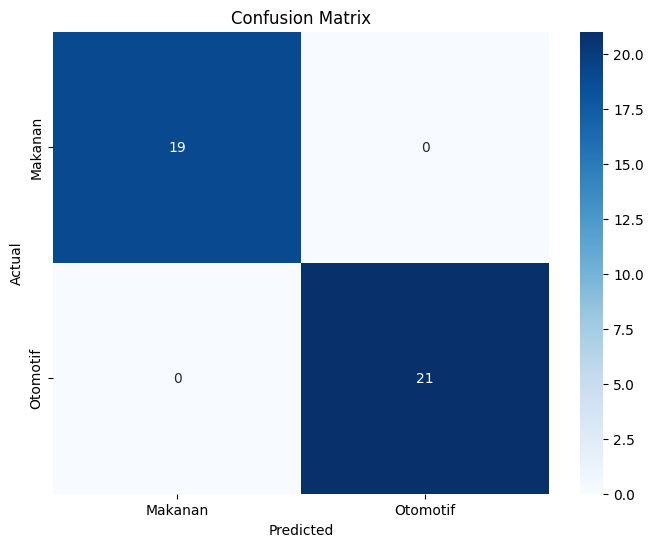

['tfidf_vectorizer.pkl']

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Membaca dataset
df = pd.read_csv("preprocessing-kompas.csv")

# Mengganti NaN dengan string kosong
df['stopword_removal'] = df['stopword_removal'].fillna('')

# Menginisialisasi TfidfVectorizer dengan normalisasi L2
vectorizer = TfidfVectorizer(norm='l2')

# Menghitung TF-IDF
tfidf_matrix = vectorizer.fit_transform(df['stopword_removal'])

# Mengubah hasilnya menjadi DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())

# Menampilkan 10 baris pertama dari DataFrame TF-IDF
tfidf_df.head(10)


# Menentukan target (y)
y = df['kategori']  # Target adalah kategori berita

# Pisahkan dataset menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(tfidf_df, y, test_size=0.2, random_state=42)

# Inisialisasi model Regresi Logistik
model = LogisticRegression(max_iter=1000)

# Latih model
model.fit(X_train, y_train)

# Lakukan prediksi pada set pengujian
y_pred = model.predict(X_test)

# Evaluasi model
print("Confusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

print("\nHasil Klasifikasi:")
class_report = classification_report(y_test, y_pred, zero_division=0)
print(class_report)

# Menampilkan akurasi
accuracy = (y_pred == y_test).mean()
print(f"Akurasi Model: {accuracy:.2f}")

# Visualisasi Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

import joblib

# Save the trained model and vectorizer
joblib.dump(model, 'news_classifier_model.pkl')
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')




In [33]:
pip install pandas


Note: you may need to restart the kernel to use updated packages.


# Reduksi Dimensi Transformasi SVD

In [34]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics.pairwise import cosine_similarity
import re
from IPython.display import display, Markdown

# 1. Membaca Dataset
# Membaca file CSV yang berisi dataset
df = pd.read_csv("preprocessing-kompas.csv")

# Mengganti nilai NaN dengan string kosong agar tidak ada data kosong yang menyebabkan error
df['stopword_removal'] = df['stopword_removal'].fillna('')

# 2. Mengonversi Data Teks ke TF-IDF
# Menginisialisasi TfidfVectorizer dengan normalisasi L2
vectorizer = TfidfVectorizer(norm='l2')

# Menghitung nilai TF-IDF untuk setiap dokumen
tfidf_matrix = vectorizer.fit_transform(df['stopword_removal'])

# Mengubah hasil TF-IDF menjadi DataFrame untuk kemudahan akses
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())

# 3. Reduksi Dimensi dengan Truncated SVD
# Menginisialisasi TruncatedSVD untuk mereduksi dimensi menjadi 100 komponen (atau sesuai kebutuhan)
svd = TruncatedSVD(n_components=100, random_state=42)

# Mengaplikasikan SVD pada matriks TF-IDF untuk menghasilkan matriks dengan dimensi yang lebih rendah
svd_matrix = svd.fit_transform(tfidf_matrix)

# Menyimpan hasil SVD dalam DataFrame untuk digunakan dalam perhitungan kemiripan
svd_df = pd.DataFrame(svd_matrix)

# Menampilkan 10 baris pertama dari DataFrame hasil SVD
svd_df.head(1000)



,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.337592,-0.021517,-0.139580,0.012380,0.049309,-0.301000,0.062393,-0.048008,-0.014957,-0.114646,...,-0.066960,0.027483,0.005332,-0.005564,-0.002992,-0.035773,0.064836,0.038292,-0.026585,0.005925
1,0.267962,-0.028597,-0.400866,-0.078876,-0.072474,0.187974,-0.038487,-0.042179,-0.029855,0.019455,...,-0.021605,0.060681,-0.025932,0.122885,0.028184,-0.136216,0.007207,-0.021920,0.092363,0.049243
2,0.305771,-0.106252,0.140257,-0.034484,0.027064,-0.070303,0.006359,-0.032031,-0.011863,-0.003957,...,-0.071552,0.038012,-0.018751,-0.012610,0.005876,0.133714,0.090088,0.010132,-0.102989,-0.082720
3,0.208004,0.033657,-0.119516,0.003564,0.016160,-0.130075,0.032853,-0.081235,-0.020253,-0.006652,...,-0.015266,0.032404,-0.019621,-0.069977,-0.169951,0.104278,-0.057868,-0.069872,-0.014942,-0.083937
4,0.339535,-0.046966,-0.080610,-0.010577,0.067616,-0.322782,0.061143,-0.015700,-0.013647,-0.148741,...,0.000900,0.005697,0.024309,0.004310,0.019195,-0.045917,-0.069091,-0.031198,0.014402,0.018205
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.046859,0.151637,0.021964,-0.014789,-0.000007,0.016409,-0.048076,-0.019921,0.013333,0.044063,...,0.008826,-0.035182,-0.021519,0.139084,-0.085663,-0.011030,-0.132326,0.031330,-0.137308,-0.102095
196,0.115979,0.295959,0.065638,-0.044275,-0.005419,0.028045,-0.062490,-0.022788,-0.136368,-0.007768,...,-0.116421,-0.231454,0.080531,0.004736,0.108721,0.061715,-0.194062,-0.043714,0.099707,-0.009700
197,0.082357,0.256297,0.052146,-0.038589,-0.011921,0.035153,-0.024667,-0.006019,-0.099399,0.014584,...,0.037514,0.010409,-0.018616,0.061343,-0.096680,-0.013627,-0.073797,-0.032654,0.107171,0.040971
198,0.099337,0.244380,0.049902,-0.034421,-0.012428,0.074713,0.224127,-0.038437,0.084200,-0.037900,...,-0.023852,-0.058698,-0.104236,0.024131,-0.188034,-0.118921,-0.055275,0.126423,-0.092542,-0.127908


Confusion Matrix:
[[19  0]
 [ 0 21]]

Hasil Klasifikasi:
              precision    recall  f1-score   support

     Makanan       1.00      1.00      1.00        19
    Otomotif       1.00      1.00      1.00        21

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40

Akurasi Model: 1.00


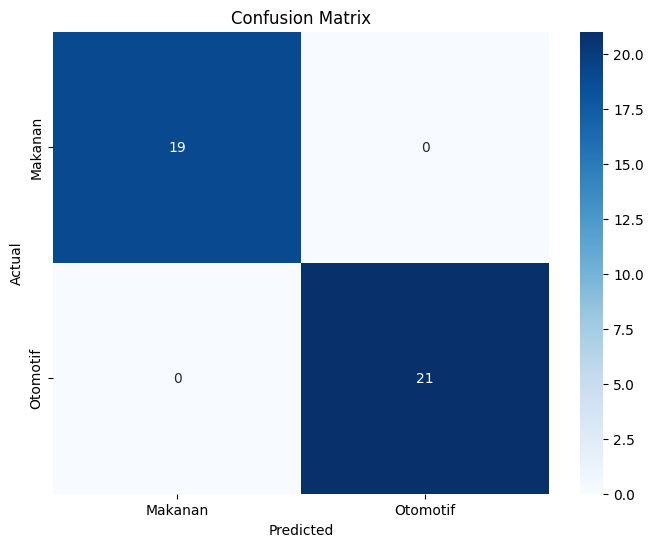

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Menentukan target (y)
y = df['kategori']  # Target adalah kategori berita

# Pisahkan dataset menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(svd_df, y, test_size=0.2, random_state=42)

# Inisialisasi model Regresi Logistik
model = LogisticRegression(max_iter=1000)

# Latih model
model.fit(X_train, y_train)

# Lakukan prediksi pada set pengujian
y_pred = model.predict(X_test)

# Evaluasi model
print("Confusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

print("\nHasil Klasifikasi:")
class_report = classification_report(y_test, y_pred, zero_division=0)
print(class_report)

# Menampilkan akurasi
accuracy = (y_pred == y_test).mean()


print(f"Akurasi Model: {accuracy:.2f}")

# Visualisasi Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


# Clustering dengan Fuzzy C-Means

In [38]:
pip install scikit-fuzzy



   ---------------------------------------- 0.0/920.8 kB ? eta -:--:--
   ---------------------------------- ----- 786.4/920.8 kB 6.7 MB/s eta 0:00:01
   ---------------------------------------- 920.8/920.8 kB 4.3 MB/s eta 0:00:00


In [39]:
!pip install scikit-fuzzy


In [40]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics.pairwise import cosine_similarity
import re
import numpy as np
from IPython.display import display, Markdown
import skfuzzy as fuzz
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from IPython.display import display, Markdown
# 1. Membaca Dataset
# Membaca file CSV yang berisi dataset
df = pd.read_csv("preprocessing-kompas.csv")

# Mengganti nilai NaN dengan string kosong agar tidak ada data kosong yang menyebabkan error
df['stopword_removal'] = df['stopword_removal'].fillna('')

# 2. Mengonversi Data Teks ke TF-IDF
# Menginisialisasi TfidfVectorizer dengan normalisasi L2
vectorizer = TfidfVectorizer(norm='l2')

# Menghitung nilai TF-IDF untuk setiap dokumen
tfidf_matrix = vectorizer.fit_transform(df['stopword_removal'])

# Mengubah hasil TF-IDF menjadi DataFrame untuk kemudahan akses
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())

# 3. Reduksi Dimensi dengan Truncated SVD
# Menginisialisasi TruncatedSVD untuk mereduksi dimensi menjadi 100 komponen (atau sesuai kebutuhan)
svd = TruncatedSVD(n_components=200, random_state=42)

# Mengaplikasikan SVD pada matriks TF-IDF untuk menghasilkan matriks dengan dimensi yang lebih rendah
svd_matrix = svd.fit_transform(tfidf_matrix)

# Menyimpan hasil SVD dalam DataFrame untuk digunakan dalam perhitungan kemiripan
svd_df = pd.DataFrame(svd_matrix)

# Menampilkan 10 baris pertama dari DataFrame hasil SVD
svd_df.head(1000)



,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,0.337592,-0.021518,-0.139578,0.012371,4.932376e-02,-0.300983,0.062387,-0.048039,-0.014985,-0.114584,...,0.004347,-0.002139,0.006298,0.002222,0.000234,0.004156,-0.004416,0.000172,0.006263,-0.001775
1,0.267962,-0.028599,-0.400866,-0.078869,-7.246130e-02,0.188016,-0.038503,-0.042224,-0.029873,0.019637,...,-0.002222,-0.000205,-0.012595,-0.000308,-0.002776,-0.004419,0.003356,0.007497,0.018687,-0.014634
2,0.305771,-0.106255,0.140258,-0.034505,2.705036e-02,-0.070246,0.006315,-0.031981,-0.011818,-0.004016,...,0.000942,0.003037,0.001101,0.004445,-0.004243,0.002421,0.005568,-0.002297,0.011619,0.005802
3,0.208003,0.033655,-0.119510,0.003563,1.621748e-02,-0.129972,0.032853,-0.081287,-0.020381,-0.006240,...,-0.002879,-0.003356,-0.002435,-0.001319,0.010311,-0.005265,0.004000,0.002995,0.000248,0.004942
4,0.339535,-0.046965,-0.080610,-0.010568,6.761729e-02,-0.322768,0.061170,-0.015665,-0.013629,-0.148703,...,-0.000897,0.005994,-0.002383,0.002293,-0.002172,-0.006590,-0.007981,-0.002552,0.004021,0.002051
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.046859,0.151636,0.021968,-0.014790,5.696112e-08,0.016450,-0.048075,-0.019953,0.013152,0.044265,...,0.006709,-0.002086,0.001126,-0.001663,-0.003399,-0.000483,-0.001262,-0.001122,0.001067,-0.000173
196,0.115979,0.295957,0.065637,-0.044256,-5.392423e-03,0.028059,-0.062472,-0.022915,-0.136462,-0.007477,...,-0.001084,0.007675,0.003934,0.006141,-0.000102,-0.002037,-0.000023,-0.000975,-0.002600,-0.003312
197,0.082357,0.256294,0.052142,-0.038599,-1.195396e-02,0.035150,-0.024668,-0.005990,-0.099416,0.014441,...,-0.003088,0.001952,0.002521,0.003066,0.002109,-0.000008,-0.001378,0.002499,-0.002950,-0.004006
198,0.099337,0.244377,0.049900,-0.034422,-1.243917e-02,0.074788,0.224100,-0.038378,0.084146,-0.037728,...,-0.004372,0.036842,0.000780,-0.010222,-0.000461,0.002360,-0.003981,0.004318,-0.001585,0.000441


In [41]:
import numpy as np
import skfuzzy as fuzz
from sklearn.metrics import accuracy_score

# 4. Menghapus Label Kategori dari Data untuk Clustering
# Misalkan kolom 'kategori' berisi label kategori asli, kita drop kolom tersebut untuk proses clustering
data_features = svd_df.drop(columns=['kategori'], errors='ignore')  # Buat pastikan kolom kategori memang ada

# 5. Proses Fuzzy C-Means Clustering
# Menentukan jumlah kluster (misalnya 2 kluster)
n_clusters = 2

# Menjalankan Fuzzy C-Means
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
    data_features.T, n_clusters, m=2, error=0.05, maxiter=1000, init=None, seed=42
)

# Menentukan kluster akhir untuk setiap data berdasarkan derajat keanggotaan tertinggi
cluster_labels = np.argmax(u, axis=0)

# 6. Mengukur Akurasi Clustering
# Misalkan kolom 'kategori' menyimpan label asli
if 'kategori' in df.columns:
    # Mengonversi label kategori ke bentuk numerik jika belum
    df['kategori_numerik'] = pd.factorize(df['kategori'])[0]
    
    # Menghitung akurasi dengan membandingkan hasil clustering dengan label asli
    akurasi = accuracy_score(df['kategori_numerik'], cluster_labels)
    print(f"Akurasi Clustering Fuzzy C-Means: {akurasi:.2f}")
else:
    print("Kolom 'kategori' tidak ditemukan pada dataset; akurasi tidak dapat dihitung.")


Akurasi Clustering Fuzzy C-Means: 0.20


,stopword_removal,kategori,cluster
0,jakarta kompascom ketua perkumpulan industri k...,Otomotif,1
1,jakarta kompascom hyptec ht produk premium aio...,Otomotif,1
2,jakarta kompascom kondisi pasar otomotif nasio...,Otomotif,1
3,jakarta kompascom kebiasaan mengecas kendaraan...,Otomotif,1
4,jakarta kompascom ketua perkumpulan industri k...,Otomotif,1
...,...,...,...
95,jakarta kompascom pt mitsubishi motors krama y...,Otomotif,1
96,depok kompascom ekspor mobil buatan indonesia ...,Otomotif,1
97,jakarta kompascom toyota indonesia pendekatan ...,Otomotif,0
98,jakarta kompascom ketua asosiasi industri sepe...,Otomotif,1


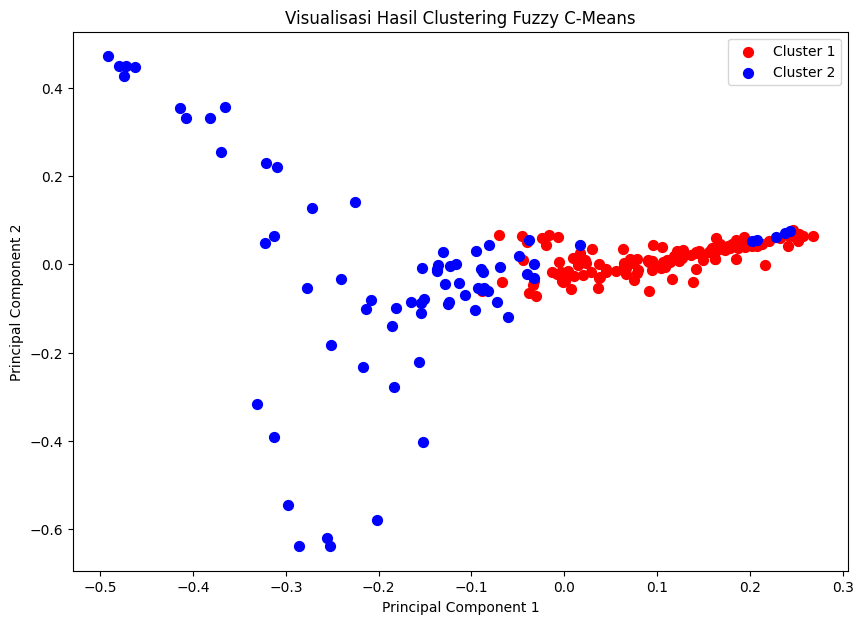

In [42]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# 7. Menambahkan Kolom Kluster ke DataFrame
# Menyimpan hasil kluster di dalam DataFrame asli untuk memudahkan tampilan
df['cluster'] = cluster_labels

# Menampilkan beberapa dokumen beserta kluster mereka
display(df[['stopword_removal', 'kategori', 'cluster']].head(100))

# 8. Visualisasi Kluster
# Menggunakan PCA untuk mereduksi data ke dalam 2 dimensi agar bisa divisualisasikan
pca = PCA(n_components=2)
pca_result = pca.fit_transform(data_features)

# Mengonversi hasil PCA ke DataFrame untuk kemudahan visualisasi
pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])
pca_df['cluster'] = cluster_labels

# Plot hasil klustering
plt.figure(figsize=(10, 7))
colors = ['red', 'blue']  # Sesuaikan warna untuk setiap kluster

for cluster in range(n_clusters):
    subset = pca_df[pca_df['cluster'] == cluster]
    plt.scatter(subset['PC1'], subset['PC2'], s=50, color=colors[cluster], label=f'Cluster {cluster + 1}')

# Menambahkan keterangan dan judul grafik
plt.title("Visualisasi Hasil Clustering Fuzzy C-Means")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()


In [43]:
import numpy as np
import skfuzzy as fuzz
from sklearn.metrics import accuracy_score

# 4. Menghapus Label Kategori dari Data untuk Clustering
# Misalkan kolom 'kategori' berisi label kategori asli, kita drop kolom tersebut untuk proses clustering
data_features = tfidf_df.drop(columns=['kategori'], errors='ignore')  # Buat pastikan kolom kategori memang ada

# 5. Proses Fuzzy C-Means Clustering
# Menentukan jumlah kluster (misalnya 2 kluster)
n_clusters = 2

# Menjalankan Fuzzy C-Means
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
    data_features.T, n_clusters, m=2, error=0.05, maxiter=1000, init=None, seed=42
)

# Menentukan kluster akhir untuk setiap data berdasarkan derajat keanggotaan tertinggi
cluster_labels = np.argmax(u, axis=0)

# 6. Mengukur Akurasi Clustering
# Misalkan kolom 'kategori' menyimpan label asli
if 'kategori' in df.columns:
    # Mengonversi label kategori ke bentuk numerik jika belum
    df['kategori_numerik'] = pd.factorize(df['kategori'])[0]
    
    # Menghitung akurasi dengan membandingkan hasil clustering dengan label asli
    akurasi = accuracy_score(df['kategori_numerik'], cluster_labels)
    print(f"Akurasi Clustering Fuzzy C-Means: {akurasi:.2f}")
else:
    print("Kolom 'kategori' tidak ditemukan pada dataset; akurasi tidak dapat dihitung.")


Akurasi Clustering Fuzzy C-Means: 0.20


,stopword_removal,kategori,cluster
0,jakarta kompascom ketua perkumpulan industri k...,Otomotif,1
1,jakarta kompascom hyptec ht produk premium aio...,Otomotif,1
2,jakarta kompascom kondisi pasar otomotif nasio...,Otomotif,1
3,jakarta kompascom kebiasaan mengecas kendaraan...,Otomotif,1
4,jakarta kompascom ketua perkumpulan industri k...,Otomotif,1
...,...,...,...
95,jakarta kompascom pt mitsubishi motors krama y...,Otomotif,1
96,depok kompascom ekspor mobil buatan indonesia ...,Otomotif,1
97,jakarta kompascom toyota indonesia pendekatan ...,Otomotif,0
98,jakarta kompascom ketua asosiasi industri sepe...,Otomotif,1


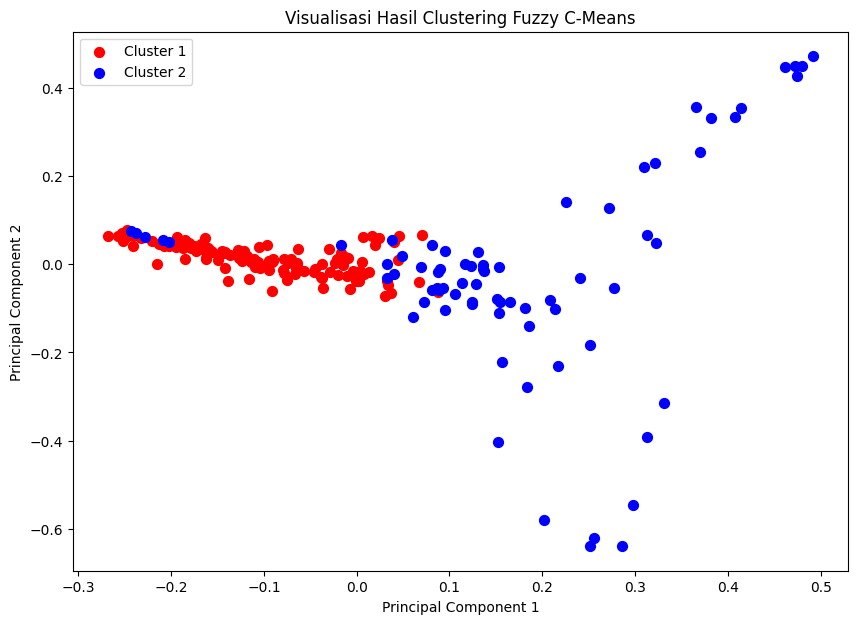

In [44]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# 7. Menambahkan Kolom Kluster ke DataFrame
# Menyimpan hasil kluster di dalam DataFrame asli untuk memudahkan tampilan
df['cluster'] = cluster_labels

# Menampilkan beberapa dokumen beserta kluster mereka
display(df[['stopword_removal', 'kategori', 'cluster']].head(100))

# 8. Visualisasi Kluster
# Menggunakan PCA untuk mereduksi data ke dalam 2 dimensi agar bisa divisualisasikan
pca = PCA(n_components=2)
pca_result = pca.fit_transform(data_features)

# Mengonversi hasil PCA ke DataFrame untuk kemudahan visualisasi
pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])
pca_df['cluster'] = cluster_labels

# Plot hasil klustering
plt.figure(figsize=(10, 7))
colors = ['red', 'blue']  # Sesuaikan warna untuk setiap kluster

for cluster in range(n_clusters):
    subset = pca_df[pca_df['cluster'] == cluster]
    plt.scatter(subset['PC1'], subset['PC2'], s=50, color=colors[cluster], label=f'Cluster {cluster + 1}')

# Menambahkan keterangan dan judul grafik
plt.title("Visualisasi Hasil Clustering Fuzzy C-Means")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()
